In [1]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [24]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [46]:
from nltk.tokenize import word_tokenize, sent_tokenize

text = "Natural language processing is fun. It is not boring."

print("Word tokenization:", word_tokenize(text))
print("Sentence tokenization:", sent_tokenize(text))


Word tokenization: ['Natural', 'language', 'processing', 'is', 'fun', '.', 'It', 'is', 'not', 'boring', '.']
Sentence tokenization: ['Natural language processing is fun.', 'It is not boring.']


In [58]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary resources (only once)
nltk.download('punkt')
nltk.download('stopwords')

# Input text
text = "This is a simple example showing off stop word filtration."

# Fix 1: Correct method name
stop_words = set(stopwords.words('english'))

# Fix 2: Use consistent variable names
words = word_tokenize(text)
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalnum()]

print("Filtered words:", filtered_words)


Filtered words: ['simple', 'example', 'showing', 'stop', 'word', 'filtration']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')




[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [62]:
# Download required NLTK data

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Input text
text = "Cats are running faster than dogs"

# Preprocessing
text = text.lower()
tokens = word_tokenize(text)
filtered = [word for word in tokens if word not in stop_words and word.isalnum()]
lemmatized = [lemmatizer.lemmatize(word) for word in filtered]

print("Preprocessed Text:", lemmatized)


Preprocessed Text: ['cat', 'running', 'faster', 'dog']


In [70]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [74]:
lemmatizer =WordNetLemmatizer()
stop_words =set(stopwords.words('english'))
df = pd.read_csv(r"D:\AI\bbc_data.csv")
df

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment
...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech
2221,Fast lifts rise into record books Two high-sp...,tech
2222,Nintendo adds media playing to DS Nintendo is...,tech
2223,Fast moving phone viruses appear Security fir...,tech


In [82]:
def preprocess(text):
    text= text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens= word_tokenize(text)
    cleaned= [lemmatizer.lemmatize(word)for word in tokens if word not in stop_words]
    return''.join(cleaned)

In [88]:
df['clean_text'] = df['data'].apply(preprocess)


In [90]:
df

,data,labels,clean_text
0,Musicians to tackle US red tape Musicians gro...,entertainment,musiciantackleuredtapemusiciangrouptackleuvisa...
1,"U2s desire to be number one U2, who have won ...",entertainment,udesirenumberoneuthreeprestigiousgrammyawardhi...
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,rockerdohertyonstagefightrocksingerpetedoherty...
3,Snicket tops US box office chart The film ada...,entertainment,snickettopuboxofficechartfilmadaptationlemonys...
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,oceantwelveraidboxofficeoceantwelvecrimecapers...
...,...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech,warningwindowwordfilewritingmicrosoftworddocum...
2221,Fast lifts rise into record books Two high-sp...,tech,fastliftriserecordbooktwohighspeedliftworldtal...
2222,Nintendo adds media playing to DS Nintendo is...,tech,nintendoaddmediumplayingdnintendoreleasingadap...
2223,Fast moving phone viruses appear Security fir...,tech,fastmovingphonevirusappearsecurityfirmwarnings...


In [94]:
vectorizer= TfidfVectorizer()
X= vectorizer.fit_transform(df['clean_text'])
y= df['labels']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
clf =MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [96]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       1.00      0.04      0.07       103
entertainment       1.00      0.05      0.09        84
     politics       1.00      0.05      0.10        80
        sport       0.24      1.00      0.38        98
         tech       1.00      0.23      0.37        80

     accuracy                           0.29       445
    macro avg       0.85      0.27      0.20       445
 weighted avg       0.83      0.29      0.20       445



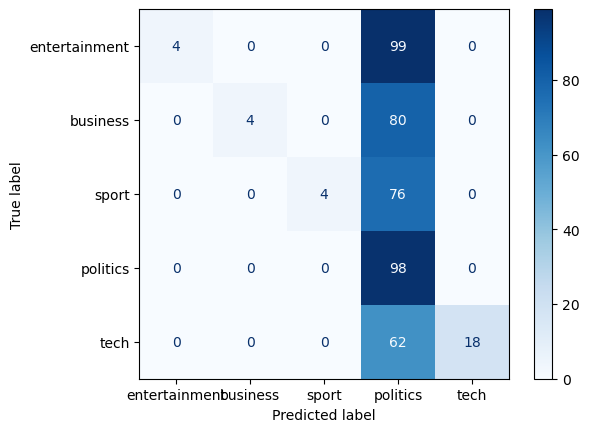

In [102]:
cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['labels'].unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [108]:
sample_text= "messi and ronaldo are friend"
sample_text_cleaned = preprocess(sample_text)
sample_vector =vectorizer.transform([sample_text_cleaned])
predicted_category = clf.predict(sample_vector)
print("Predicted Category: ", predicted_category[0])

Predicted Category:  sport
